# Prediction of White player winning probability

Prediction of White player winning probability using 10 classification model and comparing the performance of all these models and select the best one according the F1 score and AUC score 

In [4]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(12,8), 'figure.dpi':100})
import seaborn as sns 


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [5]:
#Load dataset
df = pd.read_csv('games.csv')

In [6]:
#print head in order to have a quick view
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [7]:
#print the shape of data
df.shape

(20058, 16)

In [8]:
#Print the columns of dataset
df.columns

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

In [9]:
#lets see the datatypes of features
df.dtypes

id                 object
rated                bool
created_at        float64
last_move_at      float64
turns               int64
victory_status     object
winner             object
increment_code     object
white_id           object
white_rating        int64
black_id           object
black_rating        int64
moves              object
opening_eco        object
opening_name       object
opening_ply         int64
dtype: object

As we can see there is many object types of data 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [11]:
#check the missing values
df.isnull().sum()

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

So, there is no missing values 

In [12]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,20058,19113,XRuQPSzH,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rated,20058,2,True,16155,NaN,NaN,NaN,NaN,NaN,NaN,NaN
created_at,20058.0,NaN,NaN,NaN,1483616852629.092529,28501509421.004791,1376771633173.0,1477547500000.0,1496010000000.0,1503170000000.0,1504493143790.0
last_move_at,20058.0,NaN,NaN,NaN,1483617722336.14209,28501400588.890018,1376771863841.0,1477547500000.0,1496010000000.0,1503170000000.0,1504493827262.0
turns,20058.0,NaN,NaN,NaN,60.465999,33.570585,1.0,37.0,55.0,79.0,349.0
victory_status,20058,4,resign,11147,NaN,NaN,NaN,NaN,NaN,NaN,NaN
winner,20058,3,white,10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
increment_code,20058,400,10+0,7721,NaN,NaN,NaN,NaN,NaN,NaN,NaN
white_id,20058,9438,taranga,72,NaN,NaN,NaN,NaN,NaN,NaN,NaN
white_rating,20058.0,NaN,NaN,NaN,1596.631868,291.253376,784.0,1398.0,1567.0,1793.0,2700.0


# I will clean all the columns one by one

### first I will drop useless columns 

In [13]:
df['difference'] = df['created_at']-df['last_move_at']
df['difference']

0             0.0
1             0.0
2             0.0
3             0.0
4             0.0
           ...   
20053   -321734.0
20054   -744219.0
20055   -172834.0
20056   -946699.0
20057   -736699.0
Name: difference, Length: 20058, dtype: float64

I think these two columns does not make sense because if the player started and 13 tuens(I see in turn column for this perticular id) then they should take some time to play but the start and last move time difference is zero, hence for this is not useful for our prediction I will drop it 

In [14]:
df = df.drop(['created_at', 'last_move_at'],  axis = 1)

I think black_id, white_id and increment_code is also not usefull so, I will drop it too

In [15]:
df = df.drop(['increment_code', 'white_id', 'black_id', 'difference'], axis =1)

In [16]:
df.head()

,id,rated,turns,victory_status,winner,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,13,outoftime,white,1500,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,16,resign,black,1322,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,61,mate,white,1496,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,61,mate,white,1439,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,95,mate,white,1523,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


## Moves

I am going to predict the probability of winning on the basis of first move of the both black and white player. 

In [17]:
moves = df.moves.str.split(n=2, expand=True)
moves

,0,1,2
0,d4,d5,c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5 Bf4
1,d4,Nc6,e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6 Qe5+ N...
2,e4,e5,d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc6 bxc6...
3,d4,d5,Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O-O O-O...
4,e4,e5,Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 Nf6 Bg5...
...,...,...,...
20053,d4,f5,e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5 d6 Bh...
20054,d4,d6,Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd3 O-O ...
20055,d4,d5,Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd2 b6 N...
20056,e4,d6,d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb6 c5 N...


Splited the moves into three column, first column contains the first move of white player and second column contains the first move of black player and third column contains the rest of the moves which I am not going to consider into my model because it will take more time to do data manipulation I will do it later 

In [18]:
df['white_1move'] = moves[0]
df['black_1move']= moves[1]

In [19]:
df_wm = pd.crosstab(df.white_1move, columns = df.winner, normalize = 'index')
df_wm.head()

winner,black,draw,white
white_1move,,,
Na3,0.750000,0.000000,0.250000
Nc3,0.555556,0.020202,0.424242
Nf3,0.402759,0.082759,0.514483
Nh3,0.400000,0.000000,0.600000
a3,0.333333,0.037037,0.629630


In [20]:
dict(df_wm['white'])
df['white_1move'] = df['white_1move'].map(dict(df_wm['white']))

probability of winning of white player by using their first move

In [21]:
df_bm = pd.crosstab(df.black_1move, columns = df.winner, normalize = 'index')
df_bm.head()

winner,black,draw,white
black_1move,,,
Na6,0.000000,0.000000,1.000000
Nc6,0.382653,0.053571,0.563776
Nf6,0.486119,0.062611,0.451270
Nh6,0.166667,0.000000,0.833333
a5,0.260870,0.130435,0.608696


In [22]:
dict(df_bm['white'])
df['black_1move'] = df['black_1move'].map(dict(df_bm['white']))

probability of winning of white player on the basis of first move of black player

In [23]:
df_ = pd.crosstab(df.opening_eco, columns = df.winner, normalize = 'index')
df_

winner,black,draw,white
opening_eco,,,
A00,0.566038,0.038729,0.395233
A01,0.487805,0.048780,0.463415
A02,0.548780,0.060976,0.390244
A03,0.487179,0.128205,0.384615
A04,0.354386,0.098246,0.547368
...,...,...,...
E92,0.200000,0.600000,0.200000
E94,0.500000,0.000000,0.500000
E95,0.000000,0.000000,1.000000


In [24]:
dict(df_['white'])

{'A00': 0.3952333664349553,
 'A01': 0.4634146341463415,
 'A02': 0.3902439024390244,
 'A03': 0.38461538461538464,
 'A04': 0.5473684210526316,
 'A05': 0.5625,
 'A06': 0.472,
 'A07': 0.5151515151515151,
 'A08': 0.46153846153846156,
 'A09': 0.5294117647058824,
 'A10': 0.5354330708661418,
 'A11': 0.5,
 'A12': 0.0,
 'A13': 0.7346938775510204,
 'A14': 0.0,
 'A15': 0.5333333333333333,
 'A16': 0.48,
 'A17': 0.5,
 'A18': 0.6666666666666666,
 'A20': 0.54,
 'A21': 0.5396825396825397,
 'A22': 0.4642857142857143,
 'A23': 1.0,
 'A24': 0.0,
 'A25': 0.7272727272727273,
 'A27': 0.5454545454545454,
 'A28': 0.5,
 'A29': 0.75,
 'A30': 0.5833333333333334,
 'A31': 0.0,
 'A33': 0.0,
 'A34': 0.5909090909090909,
 'A35': 0.6923076923076923,
 'A36': 0.75,
 'A38': 0.5714285714285714,
 'A39': 0.6666666666666666,
 'A40': 0.5469255663430421,
 'A41': 0.6,
 'A42': 0.47619047619047616,
 'A43': 0.47435897435897434,
 'A44': 0.7142857142857143,
 'A45': 0.40476190476190477,
 'A46': 0.34177215189873417,
 'A47': 0.25,
 'A48':

In [25]:
df['opening_eco']= df['opening_eco'].map(dict(df_['white']))

In [26]:
df.head()

,id,rated,turns,victory_status,winner,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply,white_1move,black_1move
0,TZJHLljE,False,13,outoftime,white,1500,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,0.400000,Slav Defense: Exchange Variation,5,0.499337,0.493591
1,l1NXvwaE,True,16,resign,black,1322,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,0.597381,Nimzowitsch Defense: Kennedy Variation,4,0.499337,0.563776
2,mIICvQHh,True,61,mate,white,1496,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,0.442963,King's Pawn Game: Leonardis Variation,3,0.505715,0.515312
3,kWKvrqYL,True,61,mate,white,1439,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,0.511521,Queen's Pawn Game: Zukertort Variation,3,0.499337,0.493591
4,9tXo1AUZ,True,95,mate,white,1523,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,0.573082,Philidor Defense,5,0.505715,0.515312


In [27]:
df.white_1move.nunique()

20

In [28]:
df.black_1move.nunique()

20

In [29]:
df.isnull().sum()

id                 0
rated              0
turns              0
victory_status     0
winner             0
white_rating       0
black_rating       0
moves              0
opening_eco        0
opening_name       0
opening_ply        0
white_1move        0
black_1move       18
dtype: int64

There is 18 missing value acceptable because it is possible that they started the game white payer is the first who start the game maybe after start of the game black player gaveup to play

In [30]:
df.dropna().head()

,id,rated,turns,victory_status,winner,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply,white_1move,black_1move
0,TZJHLljE,False,13,outoftime,white,1500,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,0.400000,Slav Defense: Exchange Variation,5,0.499337,0.493591
1,l1NXvwaE,True,16,resign,black,1322,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,0.597381,Nimzowitsch Defense: Kennedy Variation,4,0.499337,0.563776
2,mIICvQHh,True,61,mate,white,1496,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,0.442963,King's Pawn Game: Leonardis Variation,3,0.505715,0.515312
3,kWKvrqYL,True,61,mate,white,1439,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,0.511521,Queen's Pawn Game: Zukertort Variation,3,0.499337,0.493591
4,9tXo1AUZ,True,95,mate,white,1523,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,0.573082,Philidor Defense,5,0.505715,0.515312


In [31]:
#df.moves.unique()

In [32]:
df.opening_ply.nunique()

23

In [33]:
df.opening_name.nunique()

1477

# Now I will treat the categorical varibles

### first lets check what is rated columns 

In [34]:
df['rated'].unique()

array([False,  True])

so, it include two category true and false which seems if rated is true and if not rated is false which make sense, lets convert it into o and 1 form

In [35]:
df.victory_status.unique()

array(['outoftime', 'resign', 'mate', 'draw'], dtype=object)

In [36]:
df.drop(columns = ['opening_name', 'id','victory_status', 'turns','moves'], axis =1, inplace =True)

In [37]:
df.head()

,rated,winner,white_rating,black_rating,opening_eco,opening_ply,white_1move,black_1move
0,False,white,1500,1191,0.400000,5,0.499337,0.493591
1,True,black,1322,1261,0.597381,4,0.499337,0.563776
2,True,white,1496,1500,0.442963,3,0.505715,0.515312
3,True,white,1439,1454,0.511521,3,0.499337,0.493591
4,True,white,1523,1469,0.573082,5,0.505715,0.515312


In [38]:
df.replace({False: 0, True: 1}, inplace=True)

In [39]:
df.head()

,rated,winner,white_rating,black_rating,opening_eco,opening_ply,white_1move,black_1move
0,0,white,1500,1191,0.400000,5,0.499337,0.493591
1,1,black,1322,1261,0.597381,4,0.499337,0.563776
2,1,white,1496,1500,0.442963,3,0.505715,0.515312
3,1,white,1439,1454,0.511521,3,0.499337,0.493591
4,1,white,1523,1469,0.573082,5,0.505715,0.515312


In [40]:
df.replace({'white' : 1, 'black': 0, 'draw': 0}, inplace = True)

In [41]:
df.head()

,rated,winner,white_rating,black_rating,opening_eco,opening_ply,white_1move,black_1move
0,0,1,1500,1191,0.400000,5,0.499337,0.493591
1,1,0,1322,1261,0.597381,4,0.499337,0.563776
2,1,1,1496,1500,0.442963,3,0.505715,0.515312
3,1,1,1439,1454,0.511521,3,0.499337,0.493591
4,1,1,1523,1469,0.573082,5,0.505715,0.515312


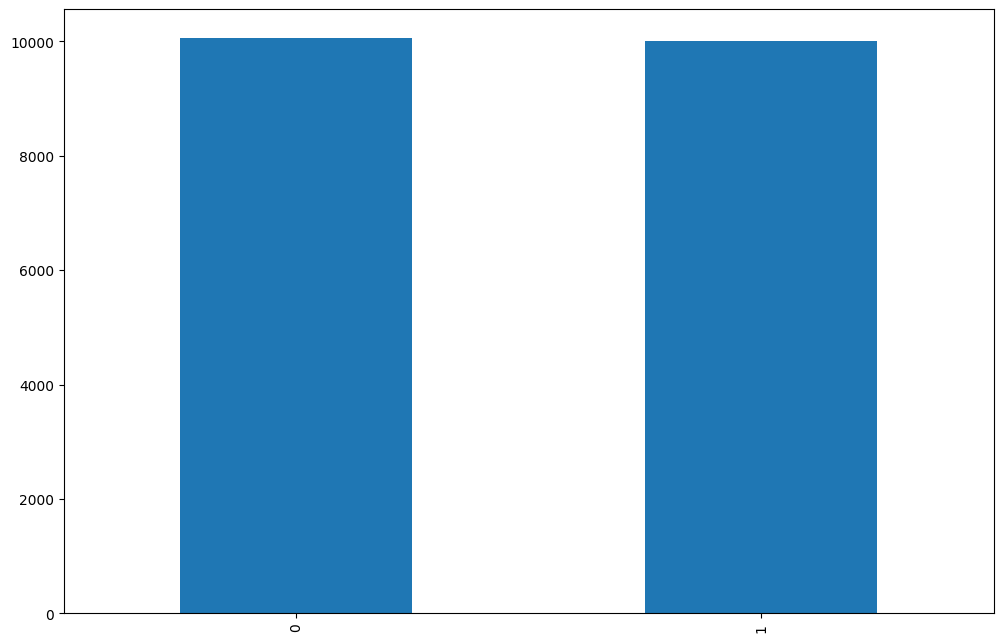

In [47]:
df.winner.value_counts().plot(kind = 'bar')

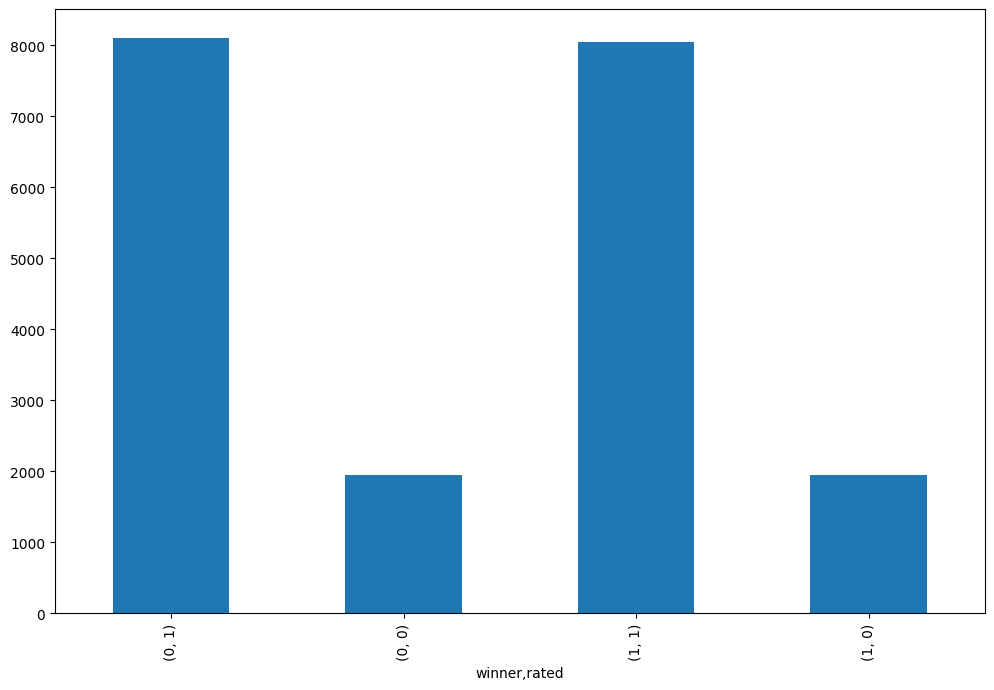

In [48]:
df.groupby('winner').rated.value_counts().plot(kind = 'bar')

In [49]:
df = df.dropna().copy()

In [50]:
df.to_csv('cleaned_data')

In [51]:
#features
x = df.drop('winner', axis = 1)
x

,rated,white_rating,black_rating,opening_eco,opening_ply,white_1move,black_1move
0,0,1500,1191,0.400000,5,0.499337,0.493591
1,1,1322,1261,0.597381,4,0.499337,0.563776
2,1,1496,1500,0.442963,3,0.505715,0.515312
3,1,1439,1454,0.511521,3,0.499337,0.493591
4,1,1523,1469,0.573082,5,0.505715,0.515312
...,...,...,...,...,...,...,...
20053,1,1691,1220,0.527273,2,0.499337,0.506024
20054,1,1233,1196,0.600000,2,0.499337,0.561694
20055,1,1219,1286,0.461434,3,0.499337,0.493591
20056,1,1360,1227,0.555921,4,0.505715,0.561694


In [52]:
#target
y = df.winner

In [53]:
y

0        1
1        0
2        1
3        1
4        1
        ..
20053    1
20054    0
20055    1
20056    1
20057    0
Name: winner, Length: 20040, dtype: int64

# Train Test split

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, stratify = y)

# Feature Scaling

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
scaler=StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [58]:
x_train_scaled=scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [59]:
#pip install xgboost

In [60]:
#pip install catboost

# Models

### Model 1 Logistic Regression

In [61]:
model1 = LogisticRegression(class_weight = 'balanced',max_iter = 1e5)
model1.fit(x_train_scaled,y_train)

LogisticRegression(class_weight='balanced', max_iter=100000.0)

In [62]:
y_pred1 = model1.predict(x_test_scaled)

In [63]:
print(accuracy_score(y_test, y_pred1))
print(precision_score(y_test, y_pred1))
print(recall_score(y_test, y_pred1))
prob_1 = model1.predict_proba(x_test_scaled)

0.6606786427145709
0.6549821486530347
0.6737896494156929


In [64]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.67      0.65      0.66      3017
           1       0.65      0.67      0.66      2995

    accuracy                           0.66      6012
   macro avg       0.66      0.66      0.66      6012
weighted avg       0.66      0.66      0.66      6012



# Feature Importance

In [65]:
#pd.Series(model1.feature_importances_, index=x_train.columns).sort_values().plot.barh()

### Model 2 KNN

In [66]:
model2= KNeighborsClassifier(2)
model2.fit(x_train_scaled, y_train)
y_pred2= model2.predict(x_test_scaled)

In [67]:
print(accuracy_score(y_test, y_pred2))
print(precision_score(y_test, y_pred2))
print(recall_score(y_test, y_pred2))
prob_2 = model1.predict_proba(x_test_scaled)

0.5883233532934131
0.648741418764302
0.37863105175292155


In [68]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.56      0.80      0.66      3017
           1       0.65      0.38      0.48      2995

    accuracy                           0.59      6012
   macro avg       0.61      0.59      0.57      6012
weighted avg       0.61      0.59      0.57      6012



# Feature importance

In [69]:
#importances = CV_RFR_regr.best_estimator_.feature_importances_

### Model 3 Gaussian

In [70]:
model3= GaussianNB()
model3.fit(x_train_scaled, y_train)
y_pred3= model3.predict(x_test_scaled)

In [71]:
print(confusion_matrix(y_test, y_pred3))
print(accuracy_score(y_test, y_pred3))
print(precision_score(y_test, y_pred3))
print(recall_score(y_test, y_pred3))
prob_3 = model3.predict_proba(x_test_scaled)

[[1370 1647]
 [ 661 2334]]
0.6161011310711909
0.586284853051997
0.7792988313856427


In [72]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.67      0.45      0.54      3017
           1       0.59      0.78      0.67      2995

    accuracy                           0.62      6012
   macro avg       0.63      0.62      0.61      6012
weighted avg       0.63      0.62      0.61      6012



# Feature importance

### Model 4 support vector machine

In [73]:
model4= SVC(probability =True)
model4.fit(x_train_scaled, y_train)
y_pred4= model4.predict(x_test_scaled)

In [74]:
print(accuracy_score(y_test, y_pred4))
print(precision_score(y_test, y_pred4))
print(recall_score(y_test, y_pred4))
prob_4 = model4.predict_proba(x_test_scaled)

0.6586826347305389
0.6556619346318917
0.6631051752921536


In [75]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.66      0.65      0.66      3017
           1       0.66      0.66      0.66      2995

    accuracy                           0.66      6012
   macro avg       0.66      0.66      0.66      6012
weighted avg       0.66      0.66      0.66      6012



### Model 5 Decision Tree

In [76]:
model5= DecisionTreeClassifier()
model5.fit(x_train_scaled, y_train)
y_pred5= model5.predict(x_test_scaled)

In [77]:
print(accuracy_score(y_test, y_pred5))
print(precision_score(y_test, y_pred5))
print(recall_score(y_test, y_pred5))
prob_5 = model5.predict_proba(x_test_scaled)

0.6142714570858283
0.6117724867724867
0.6176961602671118


In [78]:
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.62      0.61      0.61      3017
           1       0.61      0.62      0.61      2995

    accuracy                           0.61      6012
   macro avg       0.61      0.61      0.61      6012
weighted avg       0.61      0.61      0.61      6012



# Feature Importance

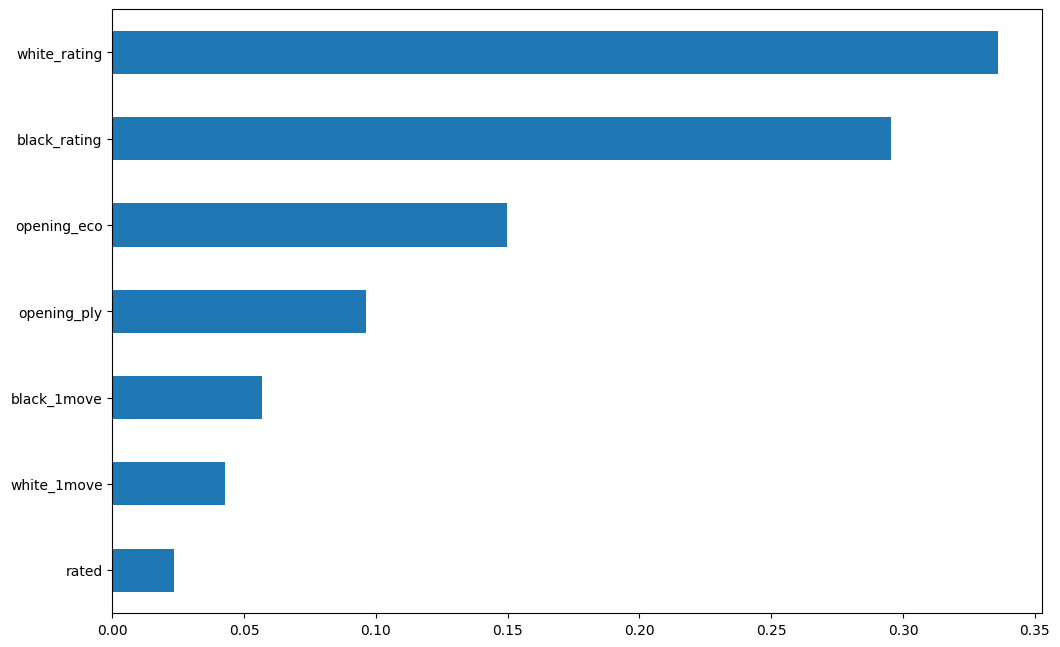

In [79]:
pd.Series(model5.feature_importances_, index=x_train.columns).sort_values().plot.barh()

### Model 6 Random forest classifier

In [80]:
model6=RandomForestClassifier(class_weight='balanced')
model6.fit(x_train_scaled, y_train)
y_pred6 = model6.predict(x_test_scaled)

In [81]:
print(accuracy_score(y_test, y_pred6))
print(precision_score(y_test, y_pred6))
print(recall_score(y_test, y_pred6))
prob_6 = model6.predict_proba(x_test_scaled)

0.6636726546906188
0.6627634660421545
0.6614357262103506


In [82]:
print(classification_report(y_test, y_pred6))

              precision    recall  f1-score   support

           0       0.66      0.67      0.67      3017
           1       0.66      0.66      0.66      2995

    accuracy                           0.66      6012
   macro avg       0.66      0.66      0.66      6012
weighted avg       0.66      0.66      0.66      6012



# Feature Importance

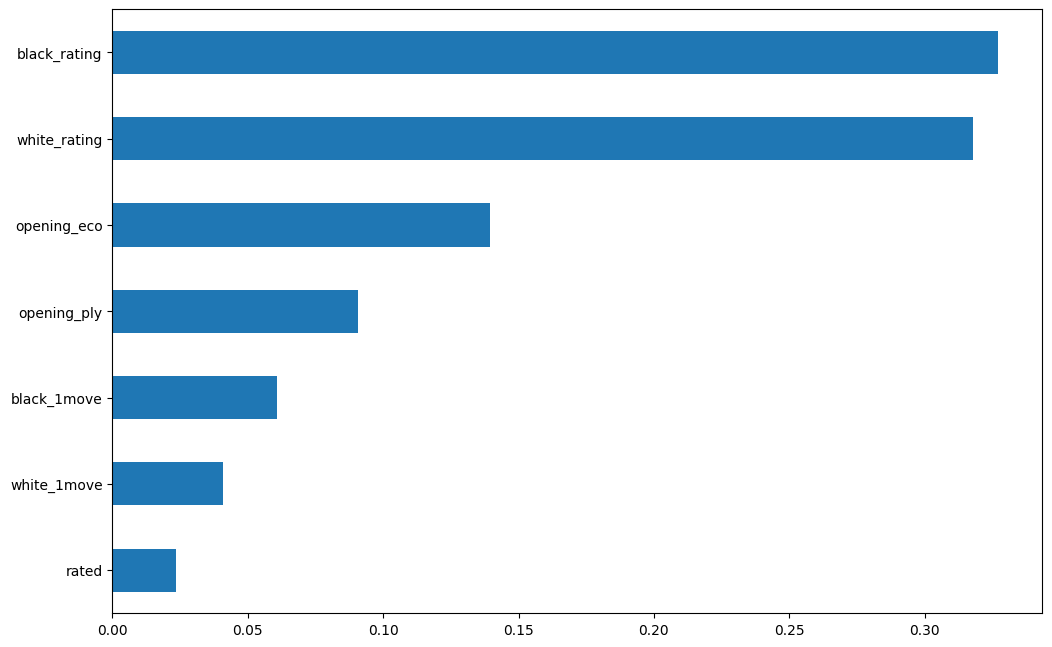

In [83]:
pd.Series(model6.feature_importances_, index=x_train.columns).sort_values().plot.barh()

### Model 7 AdaBoost

In [84]:
model7=AdaBoostClassifier()
model7.fit(x_train_scaled, y_train)
y_pred7 = model7.predict(x_test_scaled)

In [85]:
print(accuracy_score(y_test, y_pred7))
print(precision_score(y_test, y_pred7))
print(recall_score(y_test, y_pred7))
prob_7 = model7.predict_proba(x_test_scaled)

0.6551896207584831
0.65244708994709
0.6587646076794658


In [86]:
print(classification_report(y_test, y_pred7))

              precision    recall  f1-score   support

           0       0.66      0.65      0.65      3017
           1       0.65      0.66      0.66      2995

    accuracy                           0.66      6012
   macro avg       0.66      0.66      0.66      6012
weighted avg       0.66      0.66      0.66      6012



# Feature Importance

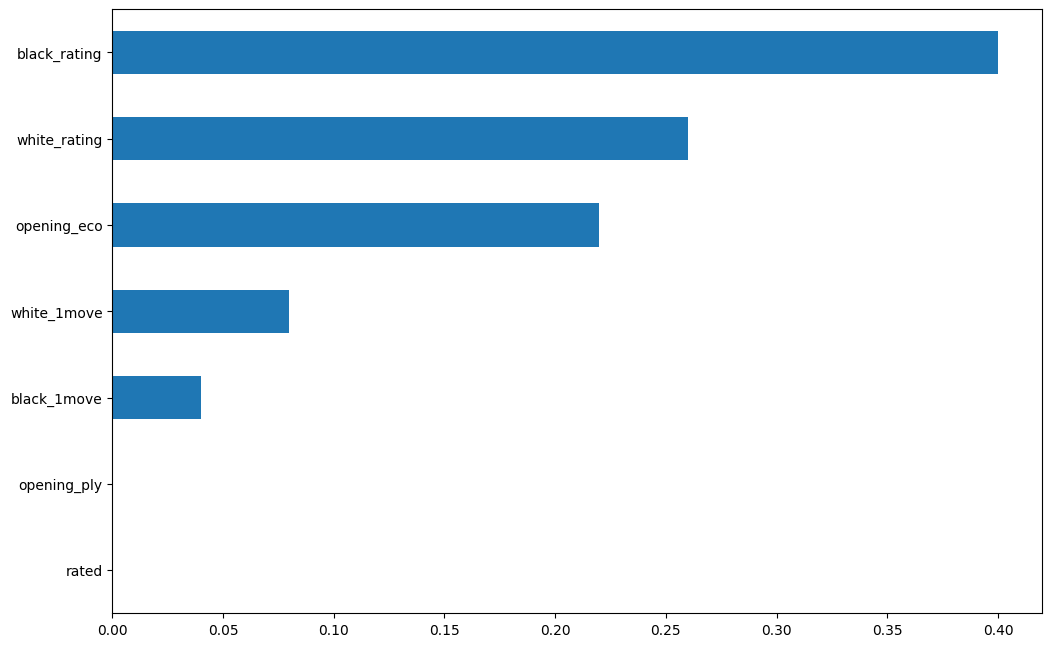

In [87]:
pd.Series(model7.feature_importances_, index=x_train.columns).sort_values().plot.barh()

### Modle 8 CatBoost 

In [88]:
model8=CatBoostClassifier()
model8.fit(x_train_scaled, y_train.map(int))
y_pred8 = model8.predict(x_test_scaled)

Learning rate set to 0.03182
0:	learn: 0.6899688	total: 68.7ms	remaining: 1m 8s
1:	learn: 0.6875355	total: 79ms	remaining: 39.4s
2:	learn: 0.6846276	total: 88.8ms	remaining: 29.5s
3:	learn: 0.6813912	total: 98.3ms	remaining: 24.5s
4:	learn: 0.6785019	total: 107ms	remaining: 21.3s
5:	learn: 0.6759879	total: 116ms	remaining: 19.2s
6:	learn: 0.6738920	total: 125ms	remaining: 17.8s
7:	learn: 0.6716217	total: 135ms	remaining: 16.8s
8:	learn: 0.6692691	total: 146ms	remaining: 16.1s
9:	learn: 0.6668321	total: 156ms	remaining: 15.5s
10:	learn: 0.6648713	total: 167ms	remaining: 15s
11:	learn: 0.6630054	total: 177ms	remaining: 14.5s
12:	learn: 0.6612359	total: 187ms	remaining: 14.2s
13:	learn: 0.6593695	total: 199ms	remaining: 14s
14:	learn: 0.6578061	total: 210ms	remaining: 13.8s
15:	learn: 0.6561269	total: 220ms	remaining: 13.5s
16:	learn: 0.6547581	total: 230ms	remaining: 13.3s
17:	learn: 0.6531587	total: 239ms	remaining: 13s
18:	learn: 0.6516515	total: 249ms	remaining: 12.8s
19:	learn: 0.650

170:	learn: 0.6008544	total: 1.59s	remaining: 7.73s
171:	learn: 0.6007681	total: 1.6s	remaining: 7.72s
172:	learn: 0.6005498	total: 1.61s	remaining: 7.71s
173:	learn: 0.6005081	total: 1.62s	remaining: 7.7s
174:	learn: 0.6003787	total: 1.63s	remaining: 7.69s
175:	learn: 0.6002430	total: 1.64s	remaining: 7.68s
176:	learn: 0.6000991	total: 1.65s	remaining: 7.67s
177:	learn: 0.5999947	total: 1.66s	remaining: 7.65s
178:	learn: 0.5998673	total: 1.67s	remaining: 7.64s
179:	learn: 0.5997630	total: 1.68s	remaining: 7.63s
180:	learn: 0.5996748	total: 1.68s	remaining: 7.62s
181:	learn: 0.5995961	total: 1.69s	remaining: 7.61s
182:	learn: 0.5994488	total: 1.7s	remaining: 7.59s
183:	learn: 0.5993549	total: 1.71s	remaining: 7.58s
184:	learn: 0.5993092	total: 1.72s	remaining: 7.57s
185:	learn: 0.5992571	total: 1.73s	remaining: 7.58s
186:	learn: 0.5992025	total: 1.75s	remaining: 7.59s
187:	learn: 0.5990741	total: 1.76s	remaining: 7.59s
188:	learn: 0.5989591	total: 1.77s	remaining: 7.58s
189:	learn: 0.5

348:	learn: 0.5858487	total: 3.42s	remaining: 6.38s
349:	learn: 0.5857881	total: 3.43s	remaining: 6.37s
350:	learn: 0.5857251	total: 3.44s	remaining: 6.36s
351:	learn: 0.5856668	total: 3.45s	remaining: 6.35s
352:	learn: 0.5855847	total: 3.46s	remaining: 6.34s
353:	learn: 0.5854975	total: 3.47s	remaining: 6.33s
354:	learn: 0.5853800	total: 3.48s	remaining: 6.32s
355:	learn: 0.5853187	total: 3.49s	remaining: 6.31s
356:	learn: 0.5852494	total: 3.5s	remaining: 6.3s
357:	learn: 0.5851440	total: 3.51s	remaining: 6.29s
358:	learn: 0.5850487	total: 3.52s	remaining: 6.28s
359:	learn: 0.5849624	total: 3.53s	remaining: 6.27s
360:	learn: 0.5848935	total: 3.54s	remaining: 6.26s
361:	learn: 0.5848206	total: 3.55s	remaining: 6.25s
362:	learn: 0.5847603	total: 3.56s	remaining: 6.25s
363:	learn: 0.5847045	total: 3.57s	remaining: 6.24s
364:	learn: 0.5846178	total: 3.58s	remaining: 6.23s
365:	learn: 0.5845309	total: 3.59s	remaining: 6.22s
366:	learn: 0.5844582	total: 3.6s	remaining: 6.21s
367:	learn: 0.5

509:	learn: 0.5726009	total: 5.04s	remaining: 4.84s
510:	learn: 0.5725320	total: 5.05s	remaining: 4.83s
511:	learn: 0.5725039	total: 5.05s	remaining: 4.82s
512:	learn: 0.5724246	total: 5.07s	remaining: 4.81s
513:	learn: 0.5722866	total: 5.07s	remaining: 4.8s
514:	learn: 0.5722437	total: 5.08s	remaining: 4.79s
515:	learn: 0.5721588	total: 5.09s	remaining: 4.78s
516:	learn: 0.5721023	total: 5.1s	remaining: 4.76s
517:	learn: 0.5720274	total: 5.11s	remaining: 4.75s
518:	learn: 0.5719358	total: 5.12s	remaining: 4.74s
519:	learn: 0.5718491	total: 5.13s	remaining: 4.73s
520:	learn: 0.5717838	total: 5.14s	remaining: 4.72s
521:	learn: 0.5717163	total: 5.15s	remaining: 4.71s
522:	learn: 0.5716434	total: 5.16s	remaining: 4.7s
523:	learn: 0.5715778	total: 5.16s	remaining: 4.69s
524:	learn: 0.5715211	total: 5.17s	remaining: 4.68s
525:	learn: 0.5714128	total: 5.18s	remaining: 4.67s
526:	learn: 0.5713545	total: 5.19s	remaining: 4.66s
527:	learn: 0.5712413	total: 5.2s	remaining: 4.65s
528:	learn: 0.57

679:	learn: 0.5599402	total: 6.64s	remaining: 3.13s
680:	learn: 0.5598754	total: 6.65s	remaining: 3.12s
681:	learn: 0.5598080	total: 6.66s	remaining: 3.1s
682:	learn: 0.5597118	total: 6.67s	remaining: 3.1s
683:	learn: 0.5596776	total: 6.68s	remaining: 3.08s
684:	learn: 0.5596001	total: 6.69s	remaining: 3.07s
685:	learn: 0.5595278	total: 6.69s	remaining: 3.06s
686:	learn: 0.5594587	total: 6.7s	remaining: 3.05s
687:	learn: 0.5594105	total: 6.71s	remaining: 3.04s
688:	learn: 0.5593248	total: 6.72s	remaining: 3.03s
689:	learn: 0.5592767	total: 6.72s	remaining: 3.02s
690:	learn: 0.5591547	total: 6.73s	remaining: 3.01s
691:	learn: 0.5590770	total: 6.74s	remaining: 3s
692:	learn: 0.5590321	total: 6.75s	remaining: 2.99s
693:	learn: 0.5589769	total: 6.75s	remaining: 2.98s
694:	learn: 0.5589051	total: 6.76s	remaining: 2.97s
695:	learn: 0.5588363	total: 6.77s	remaining: 2.96s
696:	learn: 0.5587701	total: 6.78s	remaining: 2.95s
697:	learn: 0.5587379	total: 6.79s	remaining: 2.94s
698:	learn: 0.5586

855:	learn: 0.5488269	total: 8.25s	remaining: 1.39s
856:	learn: 0.5487857	total: 8.26s	remaining: 1.38s
857:	learn: 0.5487263	total: 8.27s	remaining: 1.37s
858:	learn: 0.5486285	total: 8.28s	remaining: 1.36s
859:	learn: 0.5485558	total: 8.29s	remaining: 1.35s
860:	learn: 0.5484853	total: 8.3s	remaining: 1.34s
861:	learn: 0.5483895	total: 8.31s	remaining: 1.33s
862:	learn: 0.5483433	total: 8.32s	remaining: 1.32s
863:	learn: 0.5482879	total: 8.32s	remaining: 1.31s
864:	learn: 0.5482196	total: 8.33s	remaining: 1.3s
865:	learn: 0.5481378	total: 8.34s	remaining: 1.29s
866:	learn: 0.5480648	total: 8.35s	remaining: 1.28s
867:	learn: 0.5480352	total: 8.36s	remaining: 1.27s
868:	learn: 0.5479554	total: 8.36s	remaining: 1.26s
869:	learn: 0.5478653	total: 8.37s	remaining: 1.25s
870:	learn: 0.5478126	total: 8.38s	remaining: 1.24s
871:	learn: 0.5477490	total: 8.39s	remaining: 1.23s
872:	learn: 0.5477093	total: 8.39s	remaining: 1.22s
873:	learn: 0.5476106	total: 8.4s	remaining: 1.21s
874:	learn: 0.5

In [89]:
print(accuracy_score(y_test, y_pred8))
print(precision_score(y_test, y_pred8))
print(recall_score(y_test, y_pred8))
prob_8 = model8.predict_proba(x_test_scaled)

0.6666666666666666
0.6675684815691579
0.6590984974958264


In [90]:
print(classification_report(y_test, y_pred8))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67      3017
           1       0.67      0.66      0.66      2995

    accuracy                           0.67      6012
   macro avg       0.67      0.67      0.67      6012
weighted avg       0.67      0.67      0.67      6012



# Feature Importance

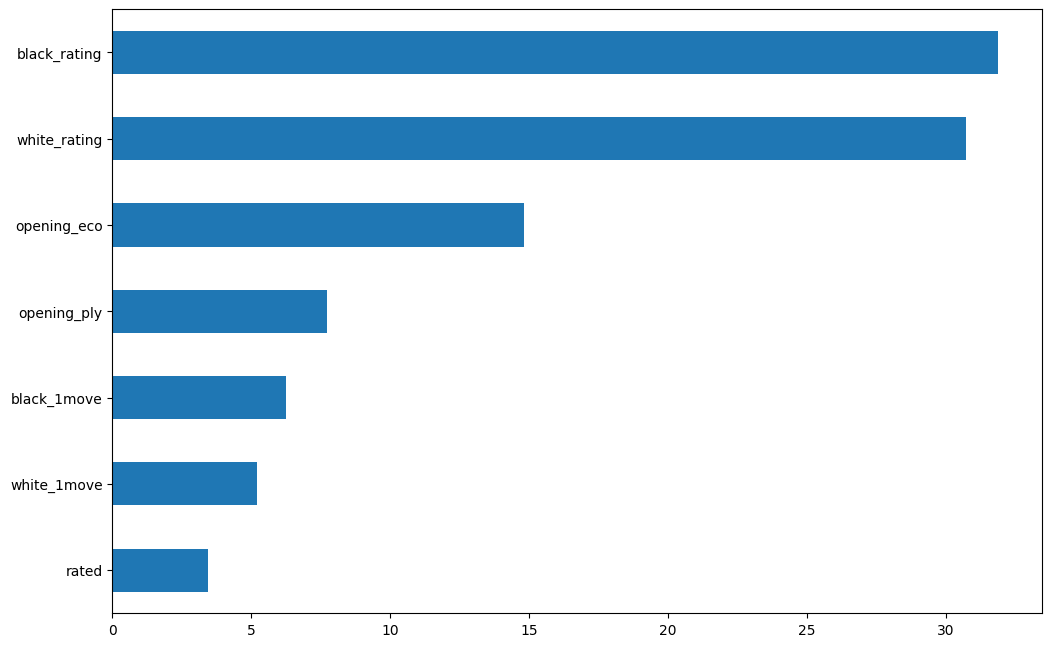

In [91]:
pd.Series(model8.feature_importances_, index=x_train.columns).sort_values().plot.barh()

### Model 9 XGBoost 

In [92]:
model9=XGBClassifier()
model9.fit(x_train_scaled, y_train)
y_pred9 = model9.predict(x_test_scaled)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:45:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [93]:
print(accuracy_score(y_test, y_pred9))
print(precision_score(y_test, y_pred9))
print(recall_score(y_test, y_pred9))
prob_9 = model9.predict_proba(x_test_scaled)

0.656187624750499
0.6546666666666666
0.6557595993322204


In [94]:
print(classification_report(y_test, y_pred9))

              precision    recall  f1-score   support

           0       0.66      0.66      0.66      3017
           1       0.65      0.66      0.66      2995

    accuracy                           0.66      6012
   macro avg       0.66      0.66      0.66      6012
weighted avg       0.66      0.66      0.66      6012



# Feature Importance

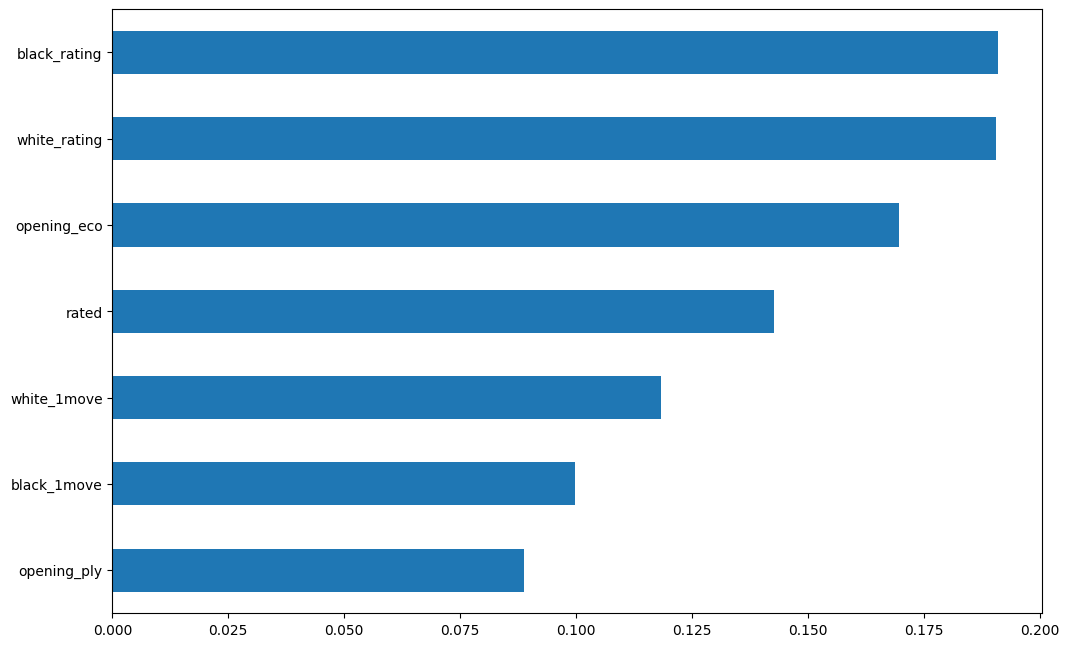

In [95]:
pd.Series(model9.feature_importances_, index=x_train.columns).sort_values().plot.barh()

### Model 10 LGBM

In [96]:
model10=LGBMClassifier()
model10.fit(x_train_scaled, y_train)
y_pred10 = model10.predict(x_test_scaled)

In [97]:
print(accuracy_score(y_test, y_pred10))
print(precision_score(y_test, y_pred10))
print(recall_score(y_test, y_pred10))
prob_10 = model10.predict_proba(x_test_scaled)

0.664836992681304
0.6620370370370371
0.6684474123539232


In [98]:
print(classification_report(y_test, y_pred10))

              precision    recall  f1-score   support

           0       0.67      0.66      0.66      3017
           1       0.66      0.67      0.67      2995

    accuracy                           0.66      6012
   macro avg       0.66      0.66      0.66      6012
weighted avg       0.66      0.66      0.66      6012



# Feature Importance

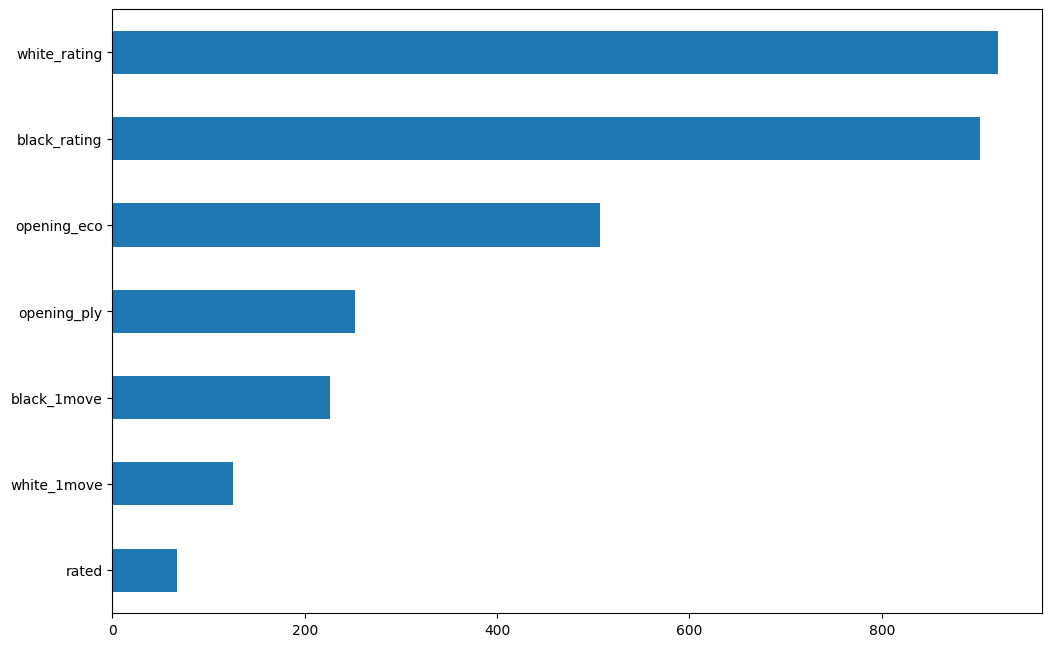

In [99]:
pd.Series(model10.feature_importances_, index=x_train.columns).sort_values().plot.barh()

# Model Comparison

In [100]:
a, p, r, f = [], [], [], []
for model in [model1,model2, model3, model4, model5, model6, model7, model8, model9, model10]:
    a.append(accuracy_score(y_test, model.predict(x_test_scaled)))
    p.append(precision_score(y_test, model.predict(x_test_scaled)))
    r.append(recall_score(y_test, model.predict(x_test_scaled)))
    f.append(f1_score(y_test, model.predict(x_test_scaled)))

In [101]:
model_score = pd.DataFrame([a,p,r,f],
             columns = ['LR',
                        'KNN',
                        'Gausssian',
                        'SVS',
                        'DT',
                        'RF',
                        'AdaB',
                        'CatB',
                        'XGB',
                        'LGBM']).T.sort_values(by=3, ascending=False).rename(columns={0:'Accuracy', 1: 'Precision', 2: 'Recall', 3: 'F1',}).round(4) 

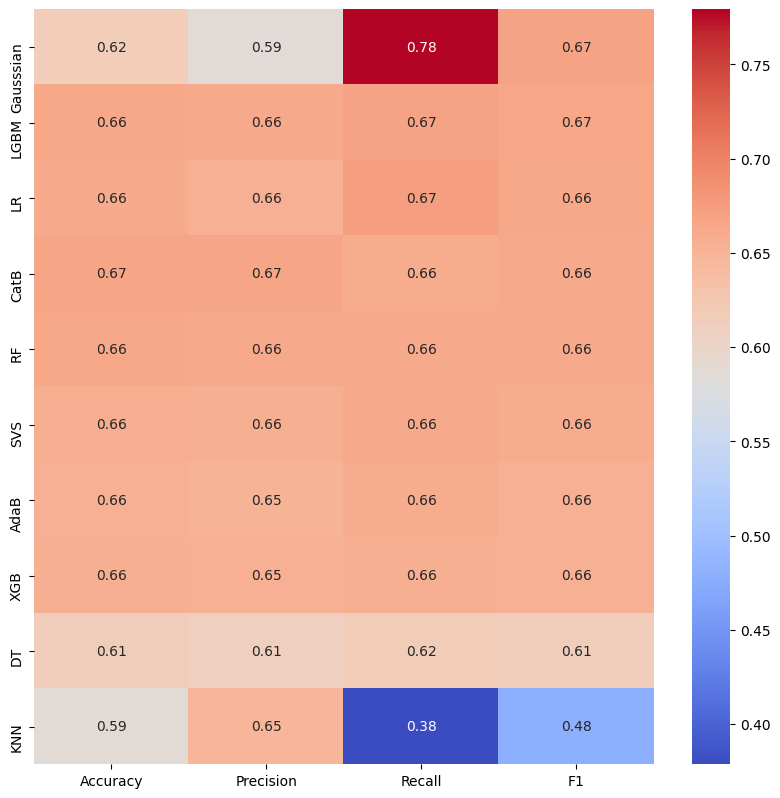

In [102]:
# Create a heatmap of the summary
plt.figure(figsize= (10,10))
sns.heatmap(model_score, annot=True, cmap = 'coolwarm')
plt.show()

In [103]:
#x_test_scaled # I dont know who is going to churn, but I want to know

#x_test['prediction']=model10.predict(x_test_scaled)

In [104]:
#x_test.sample(10)

In [105]:
#model10.predict_proba(x_test_scaled)[:,1] 

## AUC-ROC curve 

In [106]:
from sklearn.metrics import roc_curve

In [107]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, prob_1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, prob_2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, prob_3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, prob_4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, prob_5[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, prob_6[:,1], pos_label=1)
fpr7, tpr7, thresh7 = roc_curve(y_test, prob_7[:,1], pos_label=1)
fpr8, tpr8, thresh8 = roc_curve(y_test, prob_8[:,1], pos_label=1)
fpr9, tpr9, thresh9 = roc_curve(y_test, prob_9[:,1], pos_label=1)
fpr10, tpr10, thresh10 = roc_curve(y_test, prob_10[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [108]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, prob_1[:,1])
auc_score2 = roc_auc_score(y_test, prob_2[:,1])
auc_score3 = roc_auc_score(y_test, prob_3[:,1])
auc_score4 = roc_auc_score(y_test, prob_4[:,1])
auc_score5 = roc_auc_score(y_test, prob_5[:,1])
auc_score6 = roc_auc_score(y_test, prob_6[:,1])
auc_score7 = roc_auc_score(y_test, prob_7[:,1])
auc_score8 = roc_auc_score(y_test, prob_8[:,1])
auc_score9 = roc_auc_score(y_test, prob_9[:,1])
auc_score10 = roc_auc_score(y_test, prob_10[:,1])

print(auc_score1, auc_score2,auc_score3, auc_score4, auc_score5, auc_score6, auc_score7, auc_score8, auc_score9, auc_score10)

0.7245614306907491 0.7245614306907491 0.6720511979141017 0.7220967107370975 0.6144523271854594 0.7255057180152757 0.7166697561896057 0.7308646661682852 0.7220688773632775 0.7296366776358564


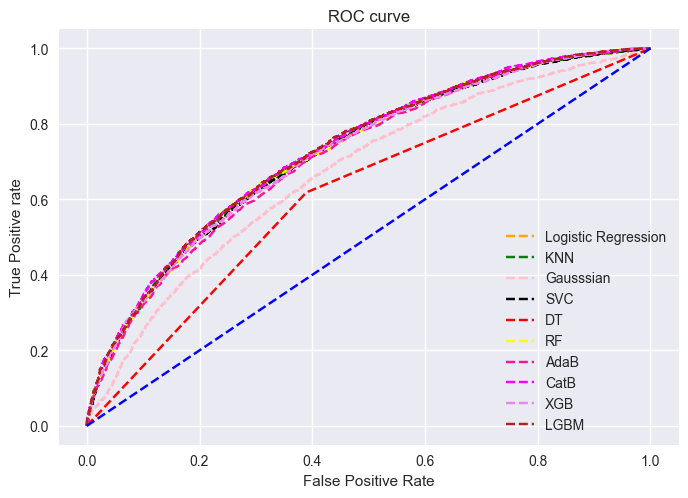

In [109]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(fpr3, tpr3, linestyle='--',color='pink', label='Gausssian')
plt.plot(fpr4, tpr4, linestyle='--',color='black', label='SVC')
plt.plot(fpr5, tpr5, linestyle='--',color='red', label='DT')
plt.plot(fpr6, tpr6, linestyle='--',color='yellow', label='RF')
plt.plot(fpr7, tpr7, linestyle='--',color='deeppink', label='AdaB')
plt.plot(fpr8, tpr8, linestyle='--',color='magenta', label='CatB')
plt.plot(fpr9, tpr9, linestyle='--',color='violet', label='XGB')
plt.plot(fpr10, tpr10, linestyle='--',color='firebrick', label='LGBM')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [110]:
print(max(auc_score1, auc_score2,auc_score3, auc_score4, auc_score5, auc_score6, auc_score7, auc_score8, auc_score9, auc_score10))

0.7308646661682852


CatBoost model AUC score is the maximum score so, I will consider catBoost as a best predictor between all the other 9 models 